In [1]:
import tensorflow as tf
import time
import pandas as pd

In [2]:
tf.debugging.set_log_device_placement(True)
cols = ['CPU','GPU']
index = [100, 1000, 5000, 10000, 12000]
results = pd.DataFrame(columns=cols, index = index)

In [3]:
for n in index:
    print(n)
    tf.random.set_seed(1234)
    with tf.device('/CPU:0'):
        start = time.time()   
        a = tf.random.uniform([n, n])
        b = tf.random.uniform([n, n])
        c = tf.matmul(a, b)
        executeTime = time.time() - start        
        results['CPU'].loc[n] = executeTime        
    print(executeTime,'\n')

100
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
0.018004894256591797 

1000
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
0.009000778198242188 

5000
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
0.3380746841430664 

10000
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MatMul in device /j

In [10]:
for n in index:
    print(n)
    tf.random.set_seed(1234)
    with tf.device('/GPU:0'):
        start = time.time()   
        a = tf.random.uniform([n, n])
        b = tf.random.uniform([n, n])
        c = tf.matmul(a, b)
        executeTime = time.time() - start        
        results['GPU'].loc[n] = executeTime        
    print(executeTime,'\n')

100
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
0.003000497817993164 

1000
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
0.003000974655151367 

5000
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
0.0010006427764892578 

10000
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device

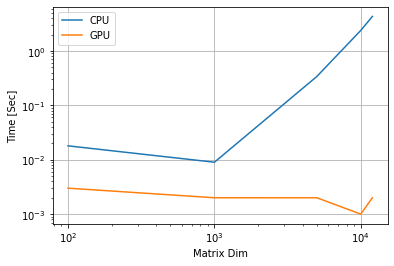

In [8]:
results.plot(logy=True, logx=True, grid=True, xlabel='Matrix Dim', ylabel='Time [Sec]');